In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df1 = pd.read_csv('2010_2023_earthquakes.csv')
df2 = pd.read_csv('2000_2009_earthquakes.csv')
df3 = pd.read_csv('1995_1999_earthquakes.csv')
df4 = pd.read_csv('1993_1994_earthquakes.csv')
df5 = pd.read_csv('1992_0801_1231_earthquakes.csv')
df6 = pd.read_csv('1992_0101_0731_earthquakes.csv')
df7 = pd.read_csv('1990_1991_earthquakes.csv')
df8 = pd.read_csv('1985_1989_earthquakes.csv')
df9 = pd.read_csv('1980_1984_earthquakes.csv')
df10 = pd.read_csv('1970_1979_earthquakes.csv')
df11 = pd.read_csv('1960_1969_earthquakes.csv')
df12 = pd.read_csv('1950_1959_earthquakes.csv')
df13 = pd.read_csv('1930_1949_earthquakes.csv')

main_df = pd.concat((df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13)).reset_index(drop=True)

main_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-20T17:37:21.730Z,33.500833,-116.761500,10.55,1.52,ml,50.0,36.0,0.03444,0.19,ci,ci39669714,2023-09-20T17:54:16.570Z,"10 km SW of Anza, CA",earthquake,0.17,0.33,0.168,27.0,reviewed,ci,ci
1,2023-09-19T17:56:36.460Z,34.111667,-117.469333,7.12,1.52,ml,41.0,28.0,0.02809,0.14,ci,ci39668970,2023-09-19T19:27:21.710Z,"2 km NNW of Fontana, CA",earthquake,0.16,0.30,0.108,24.0,reviewed,ci,ci
2,2023-09-19T16:59:23.750Z,33.640333,-116.725833,14.08,1.58,ml,69.0,28.0,0.05192,0.18,ci,ci39668898,2023-09-19T17:25:08.380Z,"11 km NNW of Anza, CA",earthquake,0.13,0.23,0.145,40.0,reviewed,ci,ci
3,2023-09-19T13:29:29.220Z,33.833833,-117.659167,4.95,2.12,ml,66.0,29.0,0.05444,0.19,ci,ci39668738,2023-09-19T17:24:33.370Z,"9 km WSW of Corona, CA",earthquake,0.17,0.34,0.153,24.0,reviewed,ci,ci
4,2023-09-19T09:54:27.540Z,34.112167,-117.470000,6.80,3.06,ml,150.0,15.0,0.02881,0.22,ci,ci39668658,2023-09-20T09:58:07.173Z,"2 km NW of Fontana, CA",earthquake,0.11,0.29,0.165,167.0,reviewed,ci,ci


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147257 entries, 0 to 147256
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             147257 non-null  object 
 1   latitude         147257 non-null  float64
 2   longitude        147257 non-null  float64
 3   depth            147254 non-null  float64
 4   mag              147257 non-null  float64
 5   magType          147257 non-null  object 
 6   nst              146568 non-null  float64
 7   gap              146508 non-null  float64
 8   dmin             66865 non-null   float64
 9   rms              146547 non-null  float64
 10  net              147257 non-null  object 
 11  id               147257 non-null  object 
 12  updated          147257 non-null  object 
 13  place            147257 non-null  object 
 14  type             147257 non-null  object 
 15  horizontalError  57701 non-null   float64
 16  depthError       134290 non-null  floa

### Calculating distance for longitude and latitude

In [4]:
print(f"{main_df['latitude'].min()}")
print(f"{main_df['latitude'].max()}")

32.563
35.4333333


In [5]:
print(f"{main_df['longitude'].min()}")
print(f"{main_df['longitude'].max()}")

-119.7238333
-116.2638333


#### Longitude - 92km per degree

In [6]:
#324km separation at 32.563 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 324}")
print(f"KM per degree: {324 / (119.7238 - 116.2638)}")

Degree per KM: 0.010679012345678992
KM per degree: 93.64161849711


In [7]:
#313km separation at 35.433 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 313}")
print(f"KM per degree: {313 / (119.7238 - 116.2638)}")

Degree per KM: 0.011054313099041514
KM per degree: 90.4624277456649


In [8]:
#319km separation at 34.000 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 319}")
print(f"KM per degree: {319 / (119.7238 - 116.2638)}")

Degree per KM: 0.010846394984326
KM per degree: 92.19653179190769


In [9]:
(93.641618 + 90.462428) / 2

92.05202299999999

#### Latitude - 109km per degree

In [10]:
#319km separation at 119.7238 longitude
print(f"Degree per KM: {(35.433 - 32.563) / 313}")
print(f"KM per degree: {313 / (35.433 - 32.563)}")

Degree per KM: 0.00916932907348242
KM per degree: 109.05923344947745


## Light EDA

In [11]:
main_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-20T17:37:21.730Z,33.500833,-116.761500,10.55,1.52,ml,50.0,36.0,0.03444,0.19,ci,ci39669714,2023-09-20T17:54:16.570Z,"10 km SW of Anza, CA",earthquake,0.17,0.33,0.168,27.0,reviewed,ci,ci
1,2023-09-19T17:56:36.460Z,34.111667,-117.469333,7.12,1.52,ml,41.0,28.0,0.02809,0.14,ci,ci39668970,2023-09-19T19:27:21.710Z,"2 km NNW of Fontana, CA",earthquake,0.16,0.30,0.108,24.0,reviewed,ci,ci
2,2023-09-19T16:59:23.750Z,33.640333,-116.725833,14.08,1.58,ml,69.0,28.0,0.05192,0.18,ci,ci39668898,2023-09-19T17:25:08.380Z,"11 km NNW of Anza, CA",earthquake,0.13,0.23,0.145,40.0,reviewed,ci,ci
3,2023-09-19T13:29:29.220Z,33.833833,-117.659167,4.95,2.12,ml,66.0,29.0,0.05444,0.19,ci,ci39668738,2023-09-19T17:24:33.370Z,"9 km WSW of Corona, CA",earthquake,0.17,0.34,0.153,24.0,reviewed,ci,ci
4,2023-09-19T09:54:27.540Z,34.112167,-117.470000,6.80,3.06,ml,150.0,15.0,0.02881,0.22,ci,ci39668658,2023-09-20T09:58:07.173Z,"2 km NW of Fontana, CA",earthquake,0.11,0.29,0.165,167.0,reviewed,ci,ci


<AxesSubplot:xlabel='mag', ylabel='Count'>

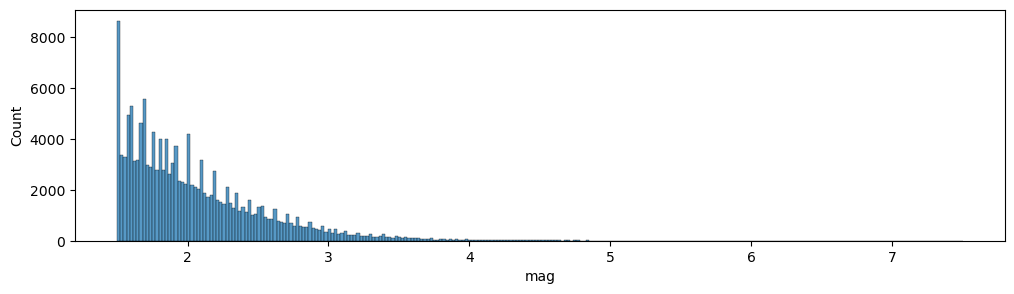

In [12]:
plt.figure(figsize=(12,3))
sns.histplot(x=main_df['mag'])

<AxesSubplot:xlabel='depth', ylabel='Count'>

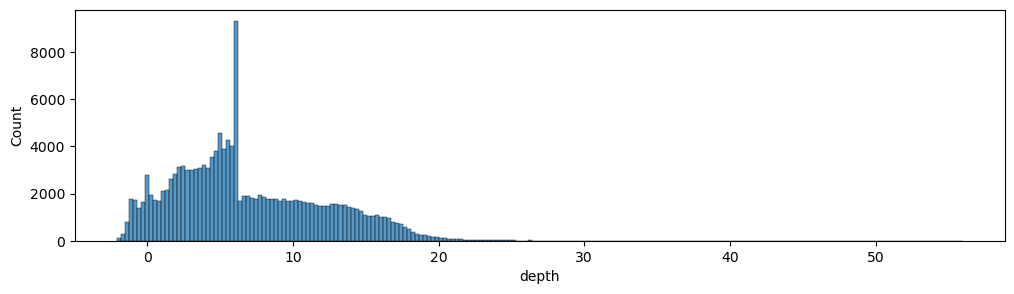

In [13]:
plt.figure(figsize=(12,3))
sns.histplot(x=main_df['depth'])

In [14]:
main_df['type'].value_counts()

earthquake    147257
Name: type, dtype: int64

In [15]:
for i in main_df['mag'][:10]:
    energy = 10 ** (4.4 + 1.5*i)
    print(f"Magnitude: {i} Energy: {np.round(energy)}")

Magnitude: 1.52 Energy: 4786301.0
Magnitude: 1.52 Energy: 4786301.0
Magnitude: 1.58 Energy: 5888437.0
Magnitude: 2.12 Energy: 38018940.0
Magnitude: 3.06 Energy: 977237221.0
Magnitude: 2.6 Energy: 199526231.0
Magnitude: 1.54 Energy: 5128614.0
Magnitude: 1.54 Energy: 5128614.0
Magnitude: 2.56 Energy: 173780083.0
Magnitude: 2.64 Energy: 229086765.0


In [16]:
main_df['energy'] = 10 ** (4.4 + main_df['mag'])

In [17]:
main_df['energy'].max()

794328234724.2821

In [18]:
main_df['time'] = pd.to_datetime(main_df['time'])

main_df['year'] = main_df['time'].dt.year

In [28]:
main_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,energy,year,gridpoint,lat_norm,long_norm
0,2023-09-20 17:37:21.730000+00:00,33.500833,-116.761500,10.55,1.52,ml,50.0,36.0,0.03444,0.19,ci,ci39669714,2023-09-20T17:54:16.570Z,"10 km SW of Anza, CA",earthquake,0.17,0.33,0.168,27.0,reviewed,ci,ci,8.317638e+05,2023,"(33.5008333, -116.7615)",-52.91167,113.942000
1,2023-09-19 17:56:36.460000+00:00,34.111667,-117.469333,7.12,1.52,ml,41.0,28.0,0.02809,0.14,ci,ci39668970,2023-09-19T19:27:21.710Z,"2 km NNW of Fontana, CA",earthquake,0.16,0.30,0.108,24.0,reviewed,ci,ci,8.317638e+05,2023,"(34.1116667, -117.4693333)",11.83667,48.821336
2,2023-09-19 16:59:23.750000+00:00,33.640333,-116.725833,14.08,1.58,ml,69.0,28.0,0.05192,0.18,ci,ci39668898,2023-09-19T17:25:08.380Z,"11 km NNW of Anza, CA",earthquake,0.13,0.23,0.145,40.0,reviewed,ci,ci,9.549926e+05,2023,"(33.6403333, -116.7258333)",-38.12467,117.223336
3,2023-09-19 13:29:29.220000+00:00,33.833833,-117.659167,4.95,2.12,ml,66.0,29.0,0.05444,0.19,ci,ci39668738,2023-09-19T17:24:33.370Z,"9 km WSW of Corona, CA",earthquake,0.17,0.34,0.153,24.0,reviewed,ci,ci,3.311311e+06,2023,"(33.8338333, -117.6591667)",-17.61367,31.356664
4,2023-09-19 09:54:27.540000+00:00,34.112167,-117.470000,6.80,3.06,ml,150.0,15.0,0.02881,0.22,ci,ci39668658,2023-09-20T09:58:07.173Z,"2 km NW of Fontana, CA",earthquake,0.11,0.29,0.165,167.0,reviewed,ci,ci,2.884032e+07,2023,"(34.1121667, -117.47)",11.88967,48.760000


In [29]:
main_df['lat_norm'] = (main_df['latitude'] - 34) * 106
main_df['long_norm'] = (main_df['longitude'] + 118) * 92

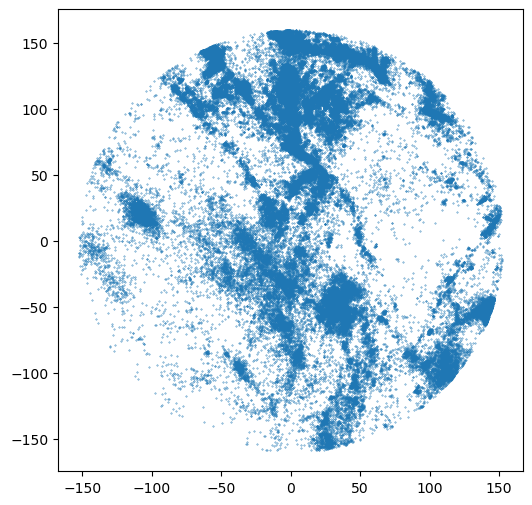

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(data=main_df, x="lat_norm", y = "long_norm", s=0.1 )

In [32]:
main_df['gridpoint'] = list(zip(main_df['lat_norm'], main_df['long_norm']))

In [33]:
lat_grid = (np.linspace(33.00, 35.00, 201) - 34) * 109
long_grid = (np.linspace(-117.00, -119.00, 201) + 118) * 92

In [34]:
#https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
grid_geo = np.array(np.meshgrid(lat_grid, long_grid)).T.reshape(-1,2)
grid_geo

array([[-109.  ,   92.  ],
       [-109.  ,   91.08],
       [-109.  ,   90.16],
       ...,
       [ 109.  ,  -90.16],
       [ 109.  ,  -91.08],
       [ 109.  ,  -92.  ]])

To normalize longitude into kilometer measures:


* (LONGITUDE + 118) * 92
* (LATITUDE - 34) * 109

### Calculate distance

In [35]:
import math

In [36]:
math.dist(grid_geo[0], main_df['gridpoint'][0])

60.22750288492404

In [37]:
grid_geo[:,0].min()

-109.0